In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 50  # Length of the channel
H = 2  # Height of the channel
Nx = 128  # Number of grid points in x-direction
Ny = 32  # Number of grid points in y-direction
Re = 10 # Reynolds number
dx = L / Nx  # Grid spacing in x-direction
dy = H / Ny  # Grid spacing in y-direction
dt = 0.01  # Time step
max_iter = 10000  # Maximum number of iterations
max_Err_u = 1e-10

In [109]:
# Initialize arrays
psi = np.zeros((Nx+1, Ny+1))  # Stream function
omega = np.zeros((Nx+1, Ny+1))  # Vorticity
u = np.ones((Nx+1, Ny+1))  # Velocity in x-direction
v = np.zeros((Nx+1, Ny+1))  # Velocity in y-direction

for i in range(Nx+1):
    psi[i, :] = np.linspace(0, H, Ny+1)

X = np.linspace(0, L, Nx+1)
Y = np.linspace(0, H, Ny+1)

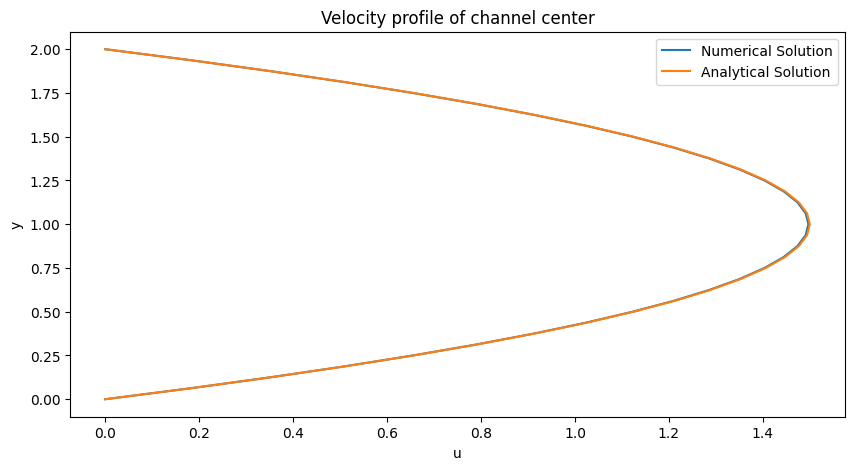

In [110]:
# Function to solve the Poisson equation for the stream function
def PoissonSolve(dx, dy, psi0, omega, maxErrorLim=1e-8, iterNumMax=10000):
    psi = psi0.copy()
    iterNum = 0
    maxError = 1
    while maxError > maxErrorLim and iterNum < iterNumMax:
        psi_old = psi.copy()
        psi[1:-1, 1:-1] = (dy**2 * (psi[2:, 1:-1] + psi[:-2, 1:-1]) +
                        dx**2 * (psi[1:-1, 2:] + psi[1:-1, :-2]) -
                        dx**2 * dy**2 * omega[1:-1, 1:-1]) / (2 * (dx**2 + dy**2))
        maxError = np.max(np.abs(psi - psi_old))
        iterNum += 1
    # print(f'Now the Error is {maxError}')
    return psi

# Main loop
for iter in range(max_iter):
    u_old = u.copy()
    psi_old = psi.copy()

    # # Update vorticity at boundaries
    # omega[:, 0] = 2 * psi[:, 1] / (dy**2)
    # omega[:, -1] = 2 * (psi[:, -2] - psi[:, -1]) / (dy**2)
    
    omega_new = omega.copy()
    # Update vorticity in the interior
    
    omega[1:-1, 1:-1] = omega[1:-1, 1:-1] + dt *(-u[1:-1,1:-1]*(omega[2:,1:-1]-omega[:-2,1:-1])/(2*dx) - v[1:-1,1:-1]*(omega[1:-1,2:]-omega[1:-1,:-2])/(2*dy) + 1/Re*((omega[2:,1:-1]-2*omega[1:-1,1:-1]+omega[:-2,1:-1])/dx**2 + (omega[1:-1,2:]-2*omega[1:-1,1:-1]+omega[1:-1,:-2])/dy**2))
    
    # omega[1:-1, 1:-1] = omega[1:-1, 1:-1] + 0.5*dt *((-u[1:-1,1:-1]*(omega[2:,1:-1]-omega[:-2,1:-1])/(2*dx) - v[1:-1,1:-1]*(omega[1:-1,2:]-omega[1:-1,:-2])/(2*dy) + 1/Re*((omega[2:,1:-1]-2*omega[1:-1,1:-1]+omega[:-2,1:-1])/dx**2 + (omega[1:-1,2:]-2*omega[1:-1,1:-1]+omega[1:-1,:-2])/dy**2))+(-u[1:-1,1:-1]*(omega_new[2:,1:-1]-omega_new[:-2,1:-1])/(2*dx) - v[1:-1,1:-1]*(omega_new[1:-1,2:]-omega_new[1:-1,:-2])/(2*dy) + 1/Re*((omega_new[2:,1:-1]-2*omega_new[1:-1,1:-1]+omega_new[:-2,1:-1])/dx**2 + (omega_new[1:-1,2:]-2*omega_new[1:-1,1:-1]+omega_new[1:-1,:-2])/dy**2)))
    # omega[1:-1, 1:-1] + dt *(-u[1:-1,1:-1]*(omega[2:,1:-1]-omega[:-2,1:-1])/(2*dx) - v[1:-1,1:-1]*(omega[1:-1,2:]-omega[1:-1,:-2])/(2*dy) + 1/Re*((omega[2:,1:-1]-2*omega[1:-1,1:-1]+omega[:-2,1:-1])/dx**2 + (omega[1:-1,2:]-2*omega[1:-1,1:-1]+omega[1:-1,:-2])/dy**2))
    
    #Update vorticity at boundaries
    omega[:, 0] = 2 * psi[:, 1] / (dy**2)
    omega[:, -1] = 2 * (psi[:, -2] - psi[:, -1]) / (dy**2)
    
    #Inlet
    
    omega[0,:] = 2 * (psi[1,:] - psi[0,:]) / (dx**2) 
    
    #Outlet
    
    omega[-1,:] = omega[-2,:]
    
    # Update stream function
    psi = PoissonSolve(dx, dy, psi, omega)
    # psi = alpha * psi + (1 - alpha) * psi_old

    psi[-1,:] = 2 * psi[-2,:] - psi[-3,:]
    # Update velocities
    u[:, 1:-1] = (psi[:, 2:] - psi[:, :-2]) / (2 * dy)
    v[1:-1, 1:-1] = -(psi[2:, 1:-1] - psi[:-2, 1:-1]) / (2 * dx)

    u[:,0]=0
    u[:,-1]=0
    v[0,:]=0
    v[-1,:]=0
    
    # Err_u = np.max(np.abs(u - u_old))
    # print(Err_u)
    
    Err_u = np.linalg.norm(u - u_old)
    if Err_u < max_Err_u:
        break

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(u[Nx//2, :], Y, label='Numerical Solution')
plt.plot(3/2 * (1 - (Y-1)**2), Y, label='Analytical Solution')
plt.title('Velocity profile of channel center')
plt.xlabel('u')
plt.ylabel('y')
plt.legend()
plt.show()

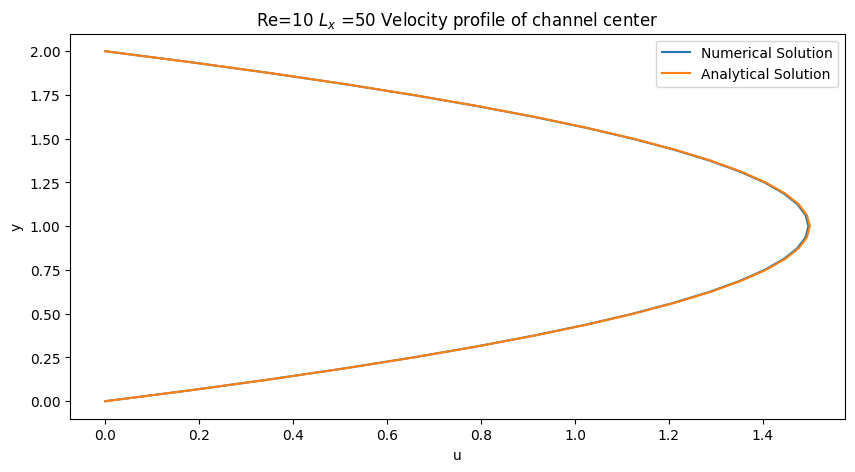

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(u[Nx-1, :], Y, label='Numerical Solution')
plt.plot(3/2 * (1 - (Y-1)**2), Y, label='Analytical Solution')
plt.title(f'Re={Re} $L_x$ ={L} Velocity profile of channel center')
plt.xlabel('u')
plt.ylabel('y')

plt.legend()
plt.savefig(f'Re{Re}_Lx{L}_Velocity profile of channel center.png')
plt.show()